#K-Fold

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('B-train.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.76,123.79,-3.12,-13.11,4.03,224.40,-248.42,7.18,6.73
1,120.85,163.83,14.75,-2.12,8.61,28.05,-73.58,670.29,7.28
2,-19.30,39.05,0.55,1.34,-1.70,-2.19,308.07,3567.67,5.22
3,-65.72,-36.37,10.76,-8.88,15.04,-5.70,14.60,1054.30,6.66
4,11.00,-64.78,-3.23,7.37,25.74,20.48,91.13,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,NaN,8.79,-10.48,NaN,12.52,-10.13,NaN,1174.43,3.69
186,-30.81,48.65,NaN,2.58,8.72,6.97,-69.11,1583.24,5.99
187,NaN,50.33,3.13,13.03,NaN,4.53,-173.70,254.72,-6.73
188,101.46,-67.42,0.44,-3.74,8.93,-4.29,21.79,40925.29,-13.39


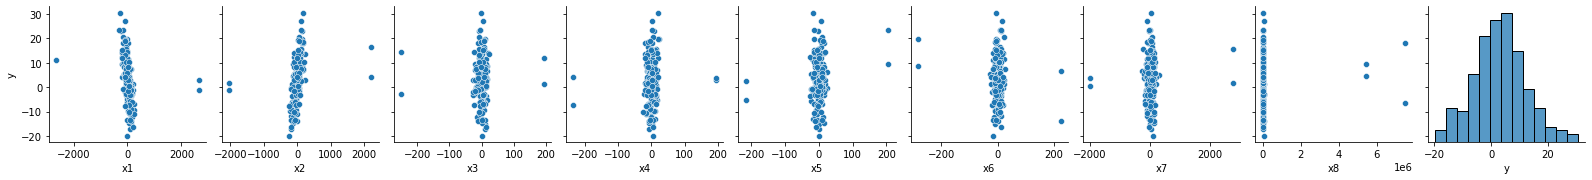

In [ ]:
sns.pairplot(df,y_vars=["y"])

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x1,-0.244655
x6,-0.115847
x3,-0.001996
x8,0.057634
x7,0.059298
x4,0.060193
x5,0.147860
x2,0.279474
y,1.000000


In [ ]:
for i in [1,2]:
  print(i)
  text = 'x' + str(i)
  low, high = df[text].quantile([0.05, 0.95])
  df.dropna(subset=[text],inplace=True)
  df.drop(df[df[text]<low].index,inplace=True)
  df.drop(df[df[text]>high].index,inplace=True)
df.dropna(subset=['y'],inplace=True)

1
2


In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x1,-0.675109
x6,-0.173958
x8,-0.022889
x3,0.010181
x4,0.076465
x5,0.090708
x7,0.096706
x2,0.616488
y,1.000000


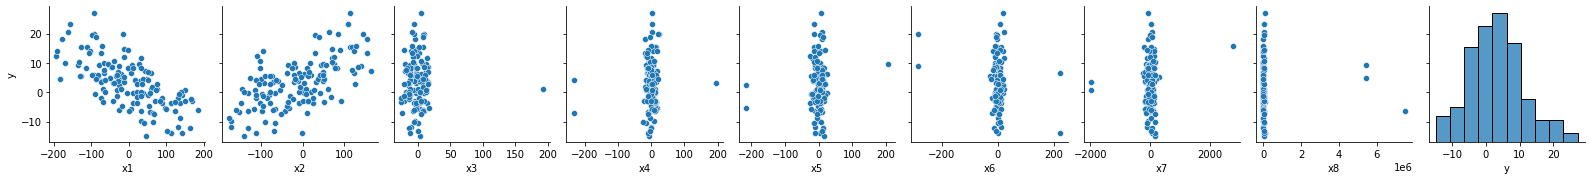

In [ ]:
sns.pairplot(df,y_vars=["y"])

In [ ]:
df.reset_index(inplace=True)

In [ ]:
X = df[["x1","x2"]]
y = df["y"]

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   138 non-null    int64  
 1   x1      138 non-null    float64
 2   x2      138 non-null    float64
 3   x3      131 non-null    float64
 4   x4      131 non-null    float64
 5   x5      132 non-null    float64
 6   x6      130 non-null    float64
 7   x7      132 non-null    float64
 8   x8      130 non-null    float64
 9   y       138 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 10.9 KB


In [ ]:
k = 5
kf = KFold(n_splits=k)

In [ ]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X_scaled):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  lm = LinearRegression()
  lm.fit(X_train,y_train)
  y_pred = lm.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  RMSEs.append(rmse)
  round_num+=1
kfold_rmse = np.array(RMSEs).mean()
print("K-Fold CV", "RMSE = ", kfold_rmse)

K-Fold CV RMSE =  4.657588975836203


In [ ]:
lm.fit(X,y)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(X.columns)):
  print("", lm.coef_[i],"*",X.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 -0.05348716323005354 * x1    +
 0.048643411175542835 * x2    +
 3.6872034052052522


#Predict

In [ ]:
df = pd.read_csv('B-test.csv')

In [ ]:
df['x1'].fillna(value = df['x1'].mean(), inplace=True)
df['x2'].fillna(value = df['x2'].mean(), inplace=True)
X_Test = df[['x1','x2']]
y_pred = lm.predict(X_Test)

In [ ]:
for x in range(10):
  df.loc[[x],['y_pred']] = y_pred[x]

In [ ]:
df[['y','y_pred']]

,y,y_pred
0,B_01,-4.885592
1,B_02,1.860410
2,B_03,2.694021
3,B_04,-3.910318
4,B_05,-0.909090
5,B_06,-1.319641
6,B_07,-4.467034
7,B_08,3.070722
8,B_09,-3.738832
9,B_10,-6.850629
